<h1><center>COMS7047A A1: Linear Regression</center></h1> 

<img src="./img/wits_logo.png" alt="Wits_Logo" style="width: 400px;"/>

***
<h4><center> Samantha Ball  &nbsp;   1603701   &nbsp;  March 2021</center></h4>

In [650]:
#----INSTALL LIBRARIES----#
#get rid of libraries that aren't allowed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split 
%matplotlib inline

## Data Import
The chosen dataset involves factors affecting medical insurance costs where costs are predicted based on variables such as *age, sex, bmi, children, smoker, region* and *charges*. 

In [651]:
#----IMPORT DATA----#
data_path = "./data/insurance.csv" # data given in CSV format
df = pd.read_csv(data_path) #read in data

pd.set_option('display.max_columns', None) #show all columns
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preparation

In [652]:
#----IMPUTE MISSING VALUES----#

#Find number of missing data entries in each column
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

age
False    1338
Name: age, dtype: int64

sex
False    1338
Name: sex, dtype: int64

bmi
False    1338
Name: bmi, dtype: int64

children
False    1338
Name: children, dtype: int64

smoker
False    1338
Name: smoker, dtype: int64

region
False    1338
Name: region, dtype: int64

charges
False    1338
Name: charges, dtype: int64



No missing values found therefore no imputation needed.

## Data Exploration

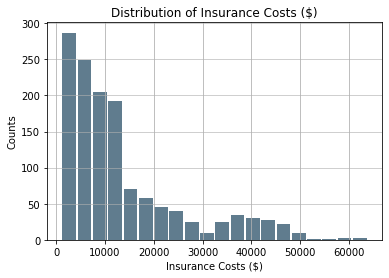

In [653]:
#----DATA EXPLORATION----#

#Visualise target variable: insurance costs (charges)
df["charges"].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Insurance Costs ($)')
plt.ylabel('Counts')
plt.xlabel('Insurance Costs ($)')
plt.grid(axis='y', alpha=0.75)

### Continuous Variables

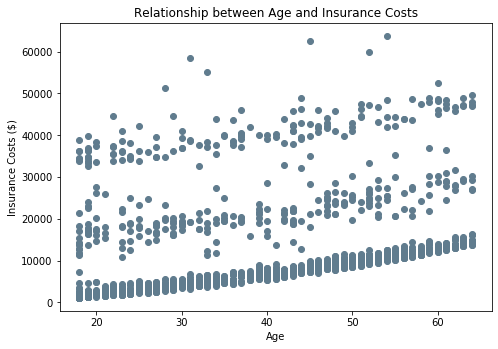

In [654]:
#Relationship between charges and age
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df["age"], df["charges"], color='#607c8e')
ax.set_xlabel('Age')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Age and Insurance Costs')
plt.show()

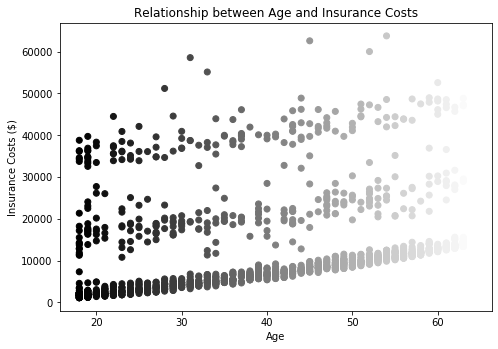

In [655]:
#Relationship between charges and age
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
#ax.scatter(df["age"], df["charges"], color='#607c8e')
ax.scatter(df["age"], df["charges"], c=df["age"], cmap='gray')
ax.set_xlabel('Age')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Age and Insurance Costs')
plt.show()

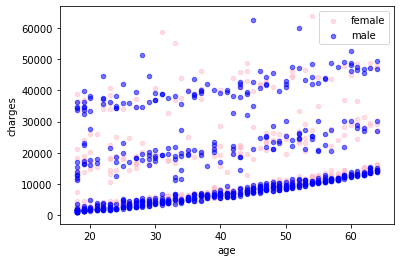

In [656]:
#Relationship between charges, age and sex

fig, ax = plt.subplots()
colors = {'female':'pink', 'male':'blue'}

grouped = df.groupby('sex')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='charges', label=key, color=colors[key], alpha=0.55)

plt.show()

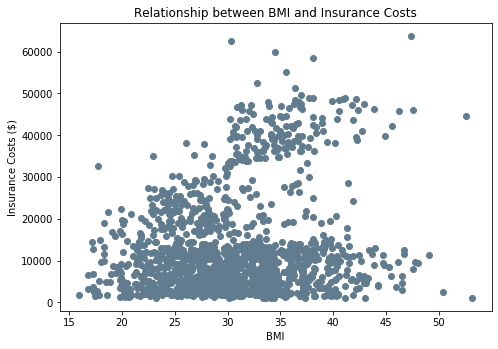

In [657]:
#Relationship between charges and bmi

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df["bmi"], df["charges"], color='#607c8e')
ax.set_xlabel('BMI')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between BMI and Insurance Costs')
plt.show()

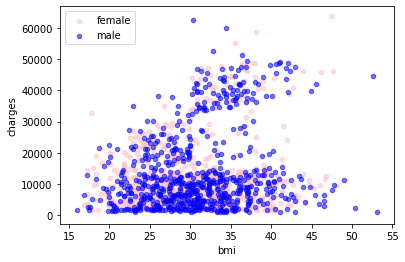

In [658]:
# Combined relationships

fig, ax = plt.subplots()
colors = {'female':'pink', 'male':'blue'}

grouped = df.groupby('sex')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='bmi', y='charges', label=key, color=colors[key], alpha=0.55)

plt.show()

### Categorical Variables

Text(0.5, 1.0, 'Relationship between No. of Dependents and Insurance Costs')

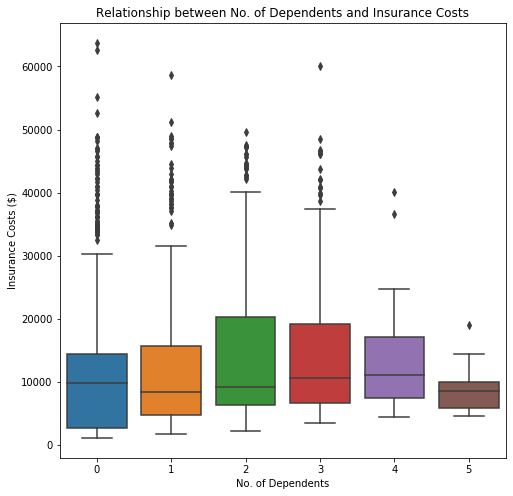

In [659]:
#Relationship between charges and children -> change colours/make more uniform??
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="children", y="charges", data=df)
ax.set_xlabel('No. of Dependents')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between No. of Dependents and Insurance Costs')

Text(0.5, 1.0, 'Relationship between Sex and Insurance Costs')

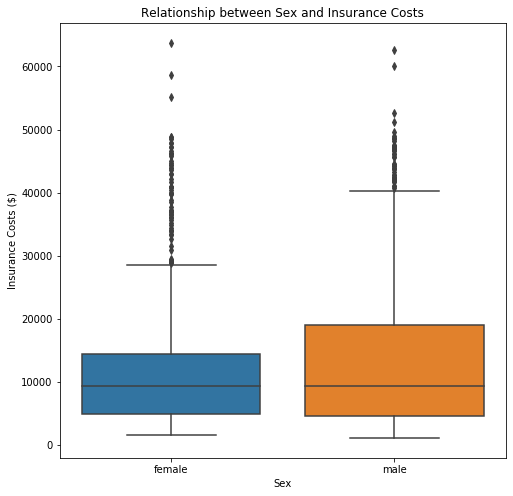

In [660]:
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="sex", y="charges", data=df)
ax.set_xlabel('Sex')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Sex and Insurance Costs')

Text(0.5, 1.0, 'Relationship between Region and Insurance Costs')

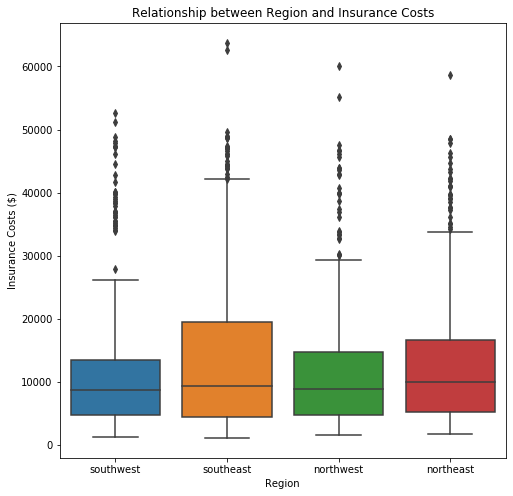

In [661]:
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="region", y="charges", data=df)
ax.set_xlabel('Region')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Region and Insurance Costs')

Text(0.5, 1.0, 'Relationship between Smoking and Insurance Costs')

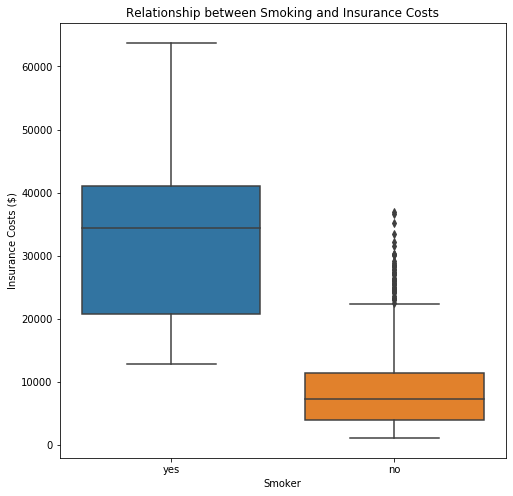

In [662]:
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="smoker", y="charges", data=df)
ax.set_xlabel('Smoker')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Smoking and Insurance Costs')

A clear correlation between smoking and increased medical costs can be observed from the contrast in distributions.

### Data Transformation

Categorical variables require encoding to be input to the linear regression model.

In [663]:
# Categorical encoding
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

In [664]:
# One Hot Encoding
dummy_variable_1=pd.get_dummies(df["sex"])
df = pd.concat([df, dummy_variable_1], axis=1)
dummy_variable_2=pd.get_dummies(df["smoker"])
df = pd.concat([df, dummy_variable_2], axis=1)

In [665]:
df.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes
0,19,female,27.900,0,yes,3,16884.92400,1,0,0,1
1,18,male,33.770,1,no,2,1725.55230,0,1,1,0
2,28,male,33.000,3,no,2,4449.46200,0,1,1,0
3,33,male,22.705,0,no,1,21984.47061,0,1,1,0
4,32,male,28.880,0,no,1,3866.85520,0,1,1,0


In [666]:
# Correlation
df["charges"].corr(df["yes"]) # v. high correlation with smoking 'yes'

0.7872514304984772

In [667]:
df["charges"].corr(df["age"]) # correlation with age

0.29900819333064765

In [668]:
df["charges"].corr(df["bmi"]) # correlation with bmi

0.19834096883362892

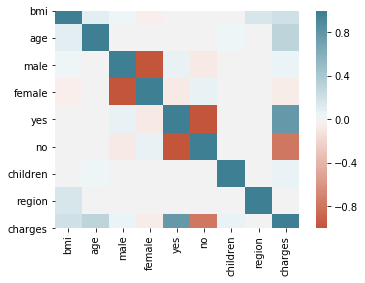

In [669]:
features = df[["bmi", "age", "male", "female", "yes", "no", "children", "region", "charges"]]
feat_corr = features.corr()
ax = sns.heatmap(
    feat_corr , 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
#male and female, and yes and no encode redundant info

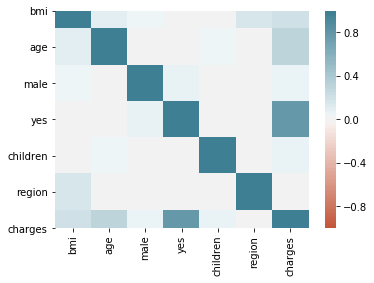

In [670]:
reduced_features = df[["bmi", "age", "male", "yes", "children", "region", "charges"]]
feat_corr = reduced_features.corr()
ax = sns.heatmap(
    feat_corr , 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

We observe that being a smoker has the highest correlation with increased medical insurance charges. This is followed by age, bmi and then very low correlation with being male and number of children. No correlation is observed with region.

## 1. Implementation of Basic Linear Regression

### Linear Regression Model

We first build a basic linear regression model. Linear regression can be written as the following equation:

$$
\begin{align}
y &= h_{\theta}(x) = \sum_{j=0}^d \theta_{j} x_j  
\end{align}
$$

where $d$ represents the number of input features.
It should be noted that we assume $x_0 = 1$ in order to provide a bias or intercept term. Therefore 

$$
\begin{align}
y = h_{\theta}(x) &= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_d x_d \\
&= \theta_0 + \sum_{j=1}^d \theta_{j} x_j 
\end{align}
$$
   
   
We implement this form of the equation in the method *linear_pred* below.   

In [671]:
#---BASIC LINEAR MODEL---#


"""
Predicts output y based on input features x according to a linear hypothesis function.

Parameters:
    Input features x
    Parameter/weight matrix theta
    Bias term theta_0

Returns:
    Value predicted by the hypothesis function for the given input x.

"""
def linear_pred(x, theta, theta_0): # takes in input features, parameters and bias term
    y = np.dot(x, theta) + theta_0 # implements linear regression equation above
    return y # returns prediction


We then define the cost function for 'least squares' linear regression, given by the equation:

$$
\begin{align}
J(\theta) &= \frac{1}{2n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})^2 
\end{align}
$$

where $n$ is the number of training examples. This cost function represents the sum of squared errors between the predicted and true values of $y$. We implement the cost function in the method *cost* below.

In [672]:
#---COST FUNCTION---#

def cost(pred, true): # takes in predicted and true values of output y (medical charges in dollars)
    cost = (1/2)*np.mean((true - pred)**2) # calculate cost as the sum of squared errors
    return cost # return cost for use in gradient descent
    

In order to fit our linear regression model to the given data, we perform gradient descent.
Our goal during gradient descent is to minimize the cost $J(\theta)$ by finding the optimal values of the parameters $\theta$. We implement the following procedure:

- Choose initial values for parameters $\theta$
- Until we reach convergence:
    * Update the value of $\theta$ by moving in the direction of the gradient $\frac{\partial J(\theta)}{\partial \theta_{j}}$

Through this process of gradient descent, we reach the global minima and therefore minimize cost $J(\theta)$.

Therefore, before implementing gradient descent, we need to first calculate the gradient of the cost function with respect to the parameters $\theta$. This gradient is calculated as follows:

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_{j}} &= \frac{1}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})(x_j^{(i)}) 
\end{align}
$$

We also require the bias term $\theta_0$ to be updated. We use the same formula above but with the input $x_0 = 1$ as follows:

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_{j}} &= \frac{1}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})(1) 
\end{align}
$$

In [673]:
#---GRADIENT OF THE COST FUNCTION---#

# calculate gradient of cost function wrt parameters theta_1 to theta_d
def gradient(pred, true, x):
    n = pred.shape[0] # number of training examples
    grad = (np.dot(np.transpose(x),(pred-true))) / n # calculate gradient
    return grad # return the gradient of the cost function w.r.t theta


# calculate gradient of cost function wrt bias term theta_0
def theta_0_gradient(pred, true, x):
    grad = np.sum(pred-true) / pred.shape[0]
    return grad

In order to provide a stopping condition, two differing methods were considered to best perform the experimentation.

1. Fixed number of iterations
2. The parameters $\theta$ cease to alter significantly such that the change in $\theta$ values falls below a certain threshold $\epsilon$

In order to implement the second condition, the Euclidean norm between the previous and updated $\theta$ values was calculated according to:

$$
\begin{align}
|| \theta_{new} - \theta_{old} ||_2 &= \sqrt{\sum_{i=0}^d (\theta_{new_i} - \theta_{old_i} )^2}
\end{align}
$$

In [674]:
#---STOPPING CONDITIONS---#

def euclid(theta, theta_prev):
    return np.linalg.norm(theta - theta_prev) # returns euclidean norm representing change in theta values

### Visualisation of Training Process

In [686]:
#---VISUALISATION---#

# evaluate model on test data using mean squared error - use cost function instead to be comparable??
def evaluate(x_test, y_test, theta, theta_0):
    y_pred = linear_pred(x_test, theta, theta_0)
    mse = mean_squared_error(y_test, y_pred)
    return mse


def plot_test_train_loss(losses, test_losses):
    plt.plot(losses, label = "Training Loss", color = 'm')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.plot(test_losses, label = "Test Loss", color = 'c')
    plt.legend()
    plt.title("Training and Test Error")
    plt.show()
    

def plot_single_hypothesis(x, y, theta, theta_0, variable_name):
    plt.scatter(x, y, marker= 'o', s=40, color='lightsteelblue')
    plt.plot(x, linear_pred(x, theta, theta_0), color='c', lw=2, label = "Theta_1 = {0:.2f}, Theta_0 = {1:.2f}".format(theta[0][0], theta_0))
    #plt.plot(x, linear_pred(x, theta, theta_0), color='c', lw=2, label = "Theta_1 = {0:.2f}".format(theta))
    plt.ylabel('Medical Insurance Costs ($)')
    plt.xlabel(variable_name)
    plt.legend(loc='upper right')
    plt.title("Fitted Regression Line")
    plt.show()

    
def plot_multiple_hypotheses(x, y, thetas, theta_0s):
    colors = ['b', 'g', 'm', 'c', 'orange']
    plt.scatter(x, y, marker= 'o', s=40, color='lightsteelblue')
    plt.ylabel('Medical Insurance Costs ($)')
    plt.xlabel('Predictor Variable')
    plt.title("Progression of Fitted Line During Training")
    i = 0
    j = 0
    while (i < len(thetas)):
        plt.plot(x, linear_pred(x, thetas[i], theta_0s[i]), color=colors[j], lw=2)
        i+= int(np.floor((len(thetas)/20)))   
        j+=1
        if (j == len(colors)):
            j = 0
    plt.show()


# do we let theta_0=0??
# training data only? 
# what to do about bias? changes the min?
# OR state we are showing simplified case with no bias?
# what do do about bias??
def plot_cost_function(x, y, theta, theta_0, thetas, theta_0s):
    colors = ['b', 'g', 'm', 'c', 'orange']
    theta_range = np.linspace(0, thetas[-1][0]*2, 500) # is it because one is a matrix?
    costs = []
    t = 0
    while (t < len(theta_range)):
        costs.append(cost(linear_pred(x, theta_range[t][0], theta_0), y)) #or 0
        t += 1
    plt.plot(theta_range, costs, color='lightsteelblue')
    plt.ylabel('Cost')
    plt.xlabel('Theta_1')
    plt.title("Movement along the Cost Function during Gradient Descent")
    i = 0
    j = 0
    while (i < len(thetas)):
        plt.scatter(thetas[i], cost(linear_pred(x, thetas[i], theta_0), y), color=colors[j], lw=2)
        i+= int(np.floor((len(thetas)/20)))   
        j+=1
        if (j == len(colors)):
            j = 0
    plt.show()

    
    
# add more visualisations here
def visualisation(x, y, losses, test_losses, thetas, theta_0s):
    #plot_test_train_loss(losses, test_losses) # plot test and training loss per iteration
    plot_multiple_hypotheses(x, y, thetas, theta_0s)
    plot_cost_function(x, y, theta, theta_0, thetas, theta_0s)
        
    #plot_thetas(thetas, losses) # plot loss according to theta value
    

### Gradient Descent

Batch gradient descent was chosen to be implemented since the the size of the training dataset was relatively small (< 1000 training samples). Therefore, for each iteration, prediction is performed for *all* the training examples before the parameters are updated. This provides a smoother descent to the global minima. 

Stochastic gradient descent and mini-batch gradient descent are implemented at the end of the notebook for comparison.

In [676]:
#---BATCH GRADIENT DESCENT---#

def batch_grad_desc(x, y,  x_train, x_test, y_train, y_test, lr, epsilon, single):
    
    # init all variables
    theta = np.zeros((len(x_train[0]), 1)) # initialise weight matrix with shape (d x 1)
    theta_0 = 0 # initialise bias term
    MAX_LOOPS = num_loops # for use if maximum iterations is used as stopping condition
    loops = 0 # loop counter
    theta_prev = np.ones((len(x_train[0]), 1))  # ensures while loop runs at least once
    
    losses = [] # track training losses
    test_losses = [] # track test losses
    thetas = [] # track parameter values
    theta_0s = [] # track bias values

    
    # perform gradient descent until convergence
    # while(loops < MAX_LOOPS): # alternative stopping condition
    while(euclid(theta, theta_prev) > epsilon): # stop when change in theta values is no longer signficant
        pred = linear_pred(x_train, theta, theta_0) # predict for all training samples
        loss = cost(pred, y_train) # calculate cost based on current theta values
        losses.append(loss)
        theta_prev = theta # store previous theta for use in stopping condition
        thetas.append(theta) # store theta values for visualisation
        theta_0s.append(theta_0) # store bias values for visualisation
        grad = gradient(pred, y_train, x_train) # calculate gradient wrt theta
        grad_theta_0 = theta_0_gradient(pred, y_train, x_train) # calculate gradient wrt theta_0
        theta = theta - (lr*grad) # update parameters
        theta_0 = theta_0 - (lr*grad_theta_0) # update bias
        test_loss = evaluate(x_test, y_test, theta, theta_0) 
        test_losses.append(test_loss)
        loops += 1
        
    # Visualise train and test error and gradient descent process
    plot_test_train_loss(losses, test_losses)
    if(single==1):
        visualisation(x, y, losses, test_losses, thetas, theta_0s)
    return [theta, theta_0] # return fitted parameter values and history 

In order to provide a baseline comparator to benchmark the outcome of the gradient descent algorithm, the closed form solution for the parameters $\theta$ was calculated as follows:

$$
\begin{align}
\theta = (X^T X)^{-1} X^Ty
\end{align}
$$

In [677]:
# NB what about bias? should we add in a column of 1's?
# calculate closed form solution
def normal_eq(x_train, y_train):
    X0 = np.ones((x_train.shape[0],1)) # add x_0 = 1
    Xnew = np.hstack((X0, x_train))
    theta_all = np.dot(np.linalg.inv(np.dot(np.transpose(Xnew), Xnew)), np.dot(np.transpose(Xnew), y_train)) #when is it a dot product and when not
    return theta_all

In [678]:
def custom_linear_regr(x, y, lr, epsilon, single):
    
     # split data into train and test sets 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

    print("Normal Equation")
    print("Intercept : {}".format(normal_eq(x_train, y_train)[0]))
    print("Coefficients : {}".format(normal_eq(x_train, y_train)[1:]))
    
    # perform batch gradient descent
    print("\nTraining model...")
    theta, theta_0 = batch_grad_desc(x, y, x_train, x_test, y_train, y_test, lr, epsilon, single) # fit model using training data
    
    print("\nCalculated Parameter Values:\n")
    print("Intercept : {}".format(theta_0))
    print("Coefficients : {}".format(theta))

    print("\nPredict using test data...")
    y_pred = linear_pred(x_test, theta, theta_0) # predict on test data

    score = r2_score(y_test , y_pred)
    print("R2 Score : {}".format(score))
    print("Model Accuracy: {}%".format(score * 100))


    print("Cost : {}".format(cost(y_pred, y_test)))
    print("MSE : {}".format(mean_squared_error(y_test, y_pred)))
    print("\n")
        
    
    return theta, theta_0
    

### Single Variable Linear Regression

#### Body Mass Index (BMI) as a Predictor for Medical Insurance Costs

Normal Equation
Intercept : [2725.6360132]
Coefficients : [[339.52829171]]

Training model...


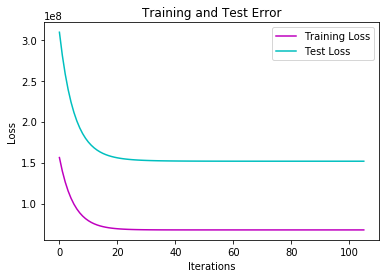

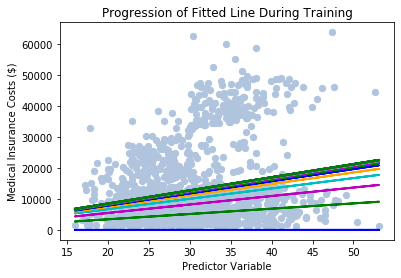

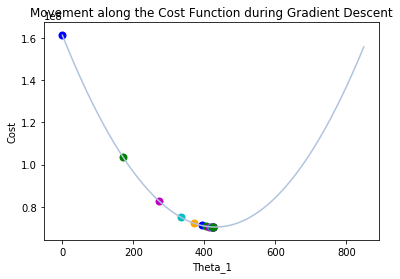


Calculated Parameter Values:

Intercept : 14.422965026352676
Coefficients : [[424.48083176]]

Predict using test data...
R2 Score : 0.05416601356648565
Model Accuracy: 5.416601356648565%
Cost : 75825241.00584236
MSE : 151650482.01168472




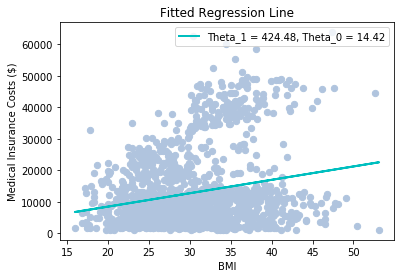

In [687]:
# NB! - Really need a standard, comparable accuracy and standard, comparable cost graph!!

learning_rate = 0.0001
epsilon = 0.0005
x = df[["bmi"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, 1) # 1 indicates single variable
variable_name = "BMI"
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

In [680]:
#---ADDITIONAL VISUALISATION---#

# 70438719.0211938
# 76645136.56160401


#### Age as a Predictor for Medical Insurance Costs

Normal Equation
Intercept : [3337.27583294]
Coefficients : [[247.90264149]]

Training model...


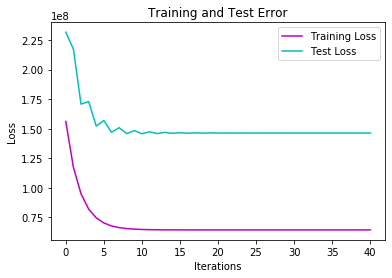

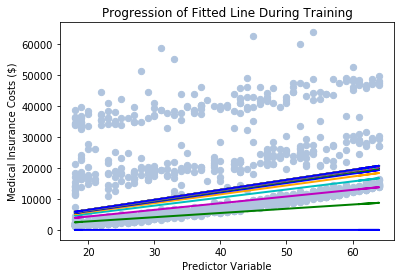

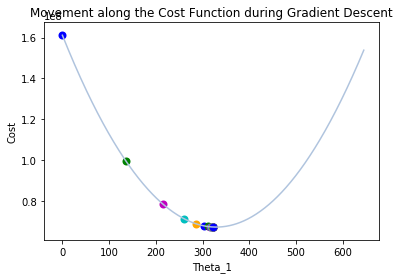


Calculated Parameter Values:

Intercept : 22.40346055854907
Coefficients : [[322.42866457]]

Predict using test data...
R2 Score : 0.08741680998198309
Model Accuracy: 8.741680998198309%
Cost : 73159604.44804826
MSE : 146319208.89609653




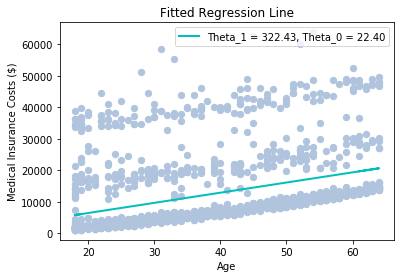

In [688]:
learning_rate = 0.001
epsilon = 0.005
x = df[["age"]].values
y = df[["charges"]].values
variable_name = "Age"
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, 1)
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

It can be noted that the fitted parameter values match closely to those found by the closed form equation.

#### Smoking as a Predictor for Medical Insurance Costs

Normal Equation
Intercept : [8613.47408583]
Coefficients : [[22675.08827665]]

Training model...


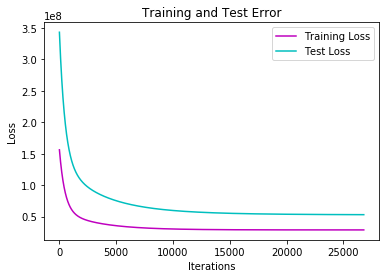

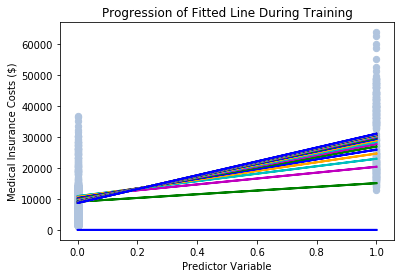

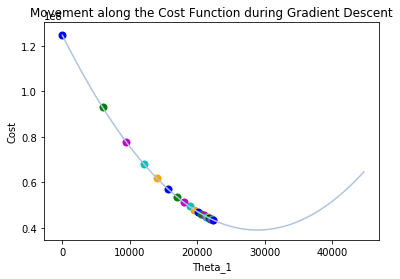


Calculated Parameter Values:

Intercept : 8690.625996913639
Coefficients : [[22347.44631182]]

Predict using test data...
R2 Score : 0.6695701325093246
Model Accuracy: 66.95701325093246%
Cost : 26489769.555103853
MSE : 52979539.11020771




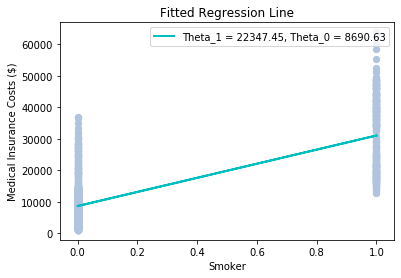

In [690]:
# how to deal with categorical variable?
# check why cost graph seems shifted?
learning_rate = 0.001
epsilon = 0.05
x = df[["yes"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, 1)
variable_name = "Smoker"
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

### Multiple Variable Linear Regression

Normal Equation
Intercept : [-4560.22449506]
Coefficients : [[233.2996238 ]
 [276.34067529]]

Training model...


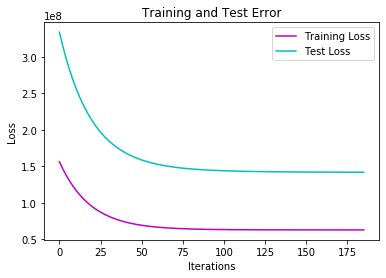


Calculated Parameter Values:

Intercept : 4.714131571147998
Coefficients : [[212.0477453 ]
 [156.48427726]]

Predict using test data...
R2 Score : 0.11621722396859702
Model Accuracy: 11.621722396859703%
Cost : 70850744.37014227
MSE : 141701488.74028453




In [684]:
# Two features
x = df[["age", "bmi"]].values #two features 
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  0.00001, 0.05, 0) 

In [691]:
# All features
learning_rate = 0.0001
epsilon = 0.05
single = 0 # multi variable
x = df[["yes", "age", "bmi", "children", "region", "male"]].values #all features 
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, single)  

Normal Equation
Intercept : [-11776.74104582]
Coefficients : [[23228.23169394]
 [  259.04134494]
 [  323.13099395]
 [  554.61283649]
 [ -279.97242054]
 [  -83.65060052]]

Training model...


KeyboardInterrupt: 

## 2. Effects of Different Learning Rates

The learning rate $\alpha$ plays a pivotal role in the performance of the gradient descent algorithm. 

In [ ]:
#----EFFECT OF DIFFERENT LEARNING RATES ON COVERGENCE---#

# NB - how to standardise??? since changing alpha affects epsilon??
# How to standardise the cost function using the bias??

Normal Equation
Intercept : [3337.27583294]
Coefficients : [[247.90264149]]

Training model...


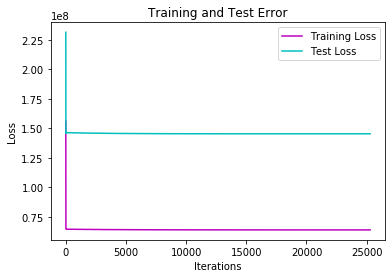

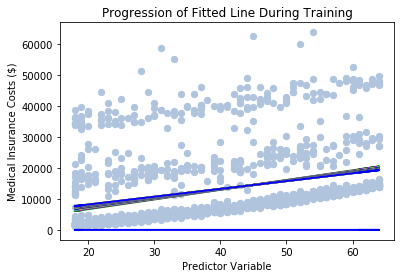

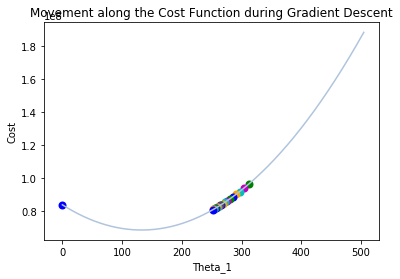


Calculated Parameter Values:

Intercept : 3137.293708697063
Coefficients : [[252.3984558]]

Predict using test data...
R2 Score : 0.09340195043459987
Model Accuracy: 9.340195043459987%
Cost : 72679790.10030557
MSE : 145359580.20061114




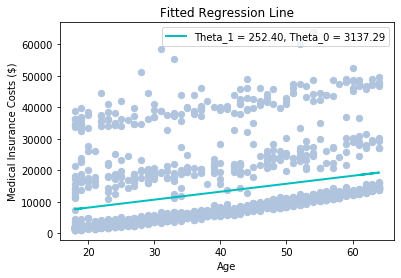

In [692]:
# Moderate alpha 
# Not sure what is happening here 
learning_rate = 0.001
epsilon = 0.0005
single = 1 # single variable
x = df[["age"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, single)
variable_name = "Age"
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

It can be observed that the larger learning rate allowed a large jump from the inital blue dot on the left of the cost function to the right of the cost function. (much closer to normal equation values but much longer to converge - need to standardise this to be able to compare properly)

Normal Equation
Intercept : [3337.27583294]
Coefficients : [[247.90264149]]

Training model...


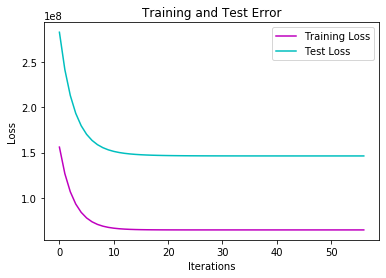

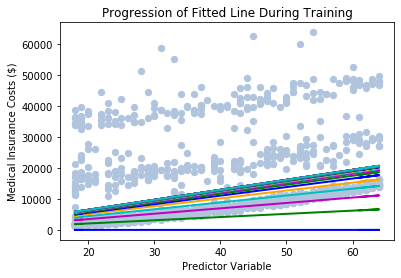

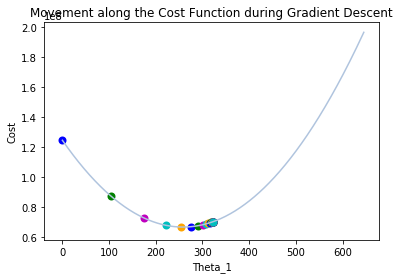


Calculated Parameter Values:

Intercept : 9.365858875673563
Coefficients : [[322.71242987]]

Predict using test data...
R2 Score : 0.08735768998500149
Model Accuracy: 8.735768998500149%
Cost : 73164343.95633799
MSE : 146328687.91267598




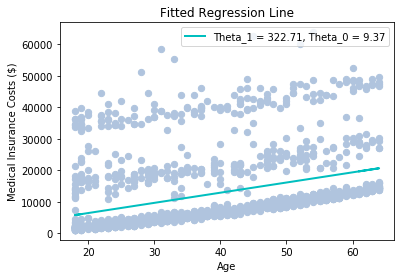

In [693]:
# Small alpha

learning_rate = 0.0001
epsilon = 0.0005
single = 1 # single variable
x = df[["age"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, single)
variable_name = "Age"
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

Normal Equation
Intercept : [3337.27583294]
Coefficients : [[247.90264149]]

Training model...


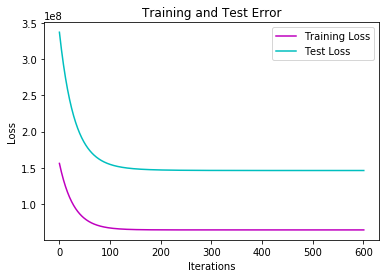

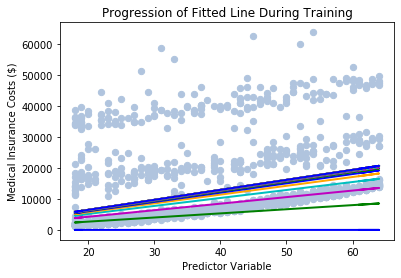

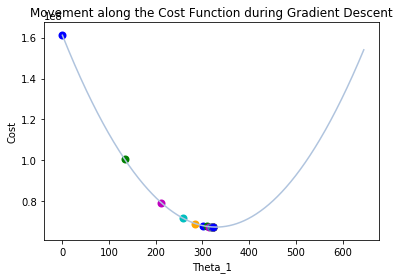


Calculated Parameter Values:

Intercept : 9.48420855582282
Coefficients : [[322.70762041]]

Predict using test data...
R2 Score : 0.08735730533637875
Model Accuracy: 8.735730533637875%
Cost : 73164374.79269505
MSE : 146328749.5853901




In [695]:
# Very small alpha

learning_rate = 0.00001
epsilon = 0.00005
single = 1 # single variable
x = df[["age"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, single)

A very small alpha causes the gradient descent algorithm to take much longer to converge. (600 iterations instead of 60.)

In [696]:
# Large alpha - uncomment the last line to see the effects of a learning rate that is too large

learning_rate = 0.01
epsilon = 0.0005
single = 1 # single variable
x = df[["age"]].values
y = df[["charges"]].values
# theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, single) # this line is left commented out to allow whole notebook to run


Normal Equation
Intercept : [3337.27583294]
Coefficients : [[247.90264149]]

Training model...


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:243: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:243: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

A learning rate that is too large causes the gradient descent algorithm to diverge as shown above.

## 3. Improved Learning

### Feature Scaling

Feature scaling ensure that different features have similar scales. This ensures that the contour lines are more even and therefore gradient descent converges much faster. Feature scaling was implemented according to the following equation:
$$
\begin{align}
x_j^{(i)} = \frac{x_j^{(i)} - x_{min_j}}{x_{max_j} - x_{min_j}}
\end{align}
$$

for each feature $j$ in order to scale the features to range between 0 and 1. A scaling factor was then utilised to investigate other scaling ranges.

In [ ]:
#----FEATURE SCALING----#
# visualise outcome of each

#check if scale_factor is a legit method
def scale(x_j, scale_factor): # takes in an array of input values for a single feature
    x_scaled = (x_j-min(x_j))/(max(x_j)-min(x_j))
    x_scaled = x_scaled * scale_factor
    return x_scaled

#### Single Variable Linear Regression

Input Features x Before Scaling

[[27.9  ]
 [33.77 ]
 [33.   ]
 [22.705]
 [28.88 ]]

Input Features x After Scaling

[[0.3212268 ]
 [0.47914985]
 [0.45843422]
 [0.18146355]
 [0.34759214]]
Normal Equation
Intercept : [0.1120957]
Coefficients : [[0.20144546]]

Training model...


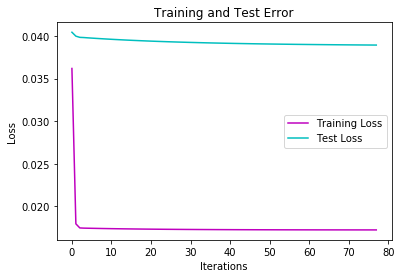

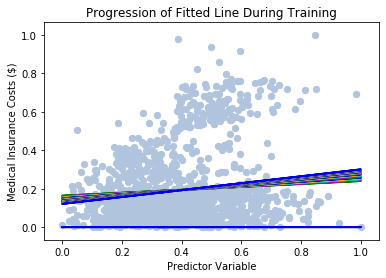

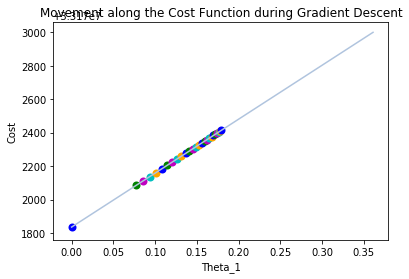


Calculated Parameter Values:

Intercept : 0.12038563380364707
Coefficients : [[0.18099416]]

Predict using test data...
R2 Score : 0.04712699316151625
Model Accuracy: 4.712699316151625%
Cost : 0.01946309058563794
MSE : 0.03892618117127588




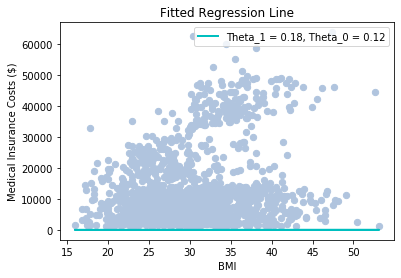

In [711]:
# Single variable, only input x scaled
# Cost function doesnt seem right?
x = df[["bmi"]].values
print("Input Features x Before Scaling\n")
print(x[0:5])
x_scaled = scale(x, 1)
print("\nInput Features x After Scaling\n")
print(x_scaled[0:5])
y = df[["charges"]].values
#y_scaled = scale(y, 1)

learning_rate = 1 # has to have a bigger learning rate?
epsilon = 0.0005
single = 1
theta, theta_0 = custom_linear_regr(x_scaled, y,  learning_rate, epsilon, single) 
variable_name = "BMI"
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

#### Multiple Variable Linear Regression

Normal Equation
Intercept : [4049.56591096]
Coefficients : [[10731.78269466]
 [10271.58290063]]

Training model...


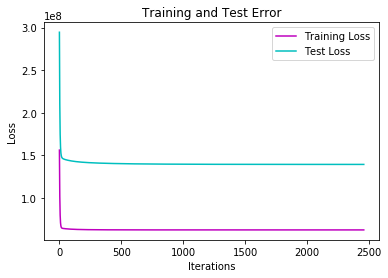


Calculated Parameter Values:

Intercept : 4057.809482640522
Coefficients : [[10732.28983338]
 [10250.64528999]]

Predict using test data...
R2 Score : 0.1312812472219359
Model Accuracy: 13.12812472219359%
Cost : 69643097.77456042
MSE : 139286195.54912084




In [717]:
# Two features
df["age_scaled"] = scale(df[["age"]].values, 1)
df["bmi_scaled"] = scale(df[["bmi"]].values, 1)
x_scaled = df[["age_scaled", "bmi_scaled"]].values #two features 
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x_scaled, y,  0.1, 0.05, 0) 

In [ ]:
It can be observed that the parameter values are very close to those calculated using the normal equation.

Normal Equation
Intercept : [-1956.82617345]
Coefficients : [[23228.23169394]
 [11915.9018671 ]
 [12010.77904525]
 [ 2773.06418247]
 [ -839.91726162]
 [  -83.65060052]]

Training model...


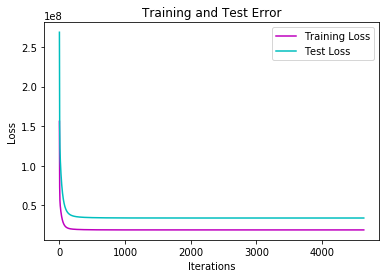


Calculated Parameter Values:

Intercept : -1956.7439477346572
Coefficients : [[23228.22643897]
 [11915.9077899 ]
 [12010.56733085]
 [ 2773.05537248]
 [ -839.90837818]
 [  -83.65247174]]

Predict using test data...
R2 Score : 0.7879640368927427
Model Accuracy: 78.79640368927427%
Cost : 16998414.34662152
MSE : 33996828.69324304




(array([[23228.22643897],
        [11915.9077899 ],
        [12010.56733085],
        [ 2773.05537248],
        [ -839.90837818],
        [  -83.65247174]]), -1956.7439477346572)

In [713]:
# Multiple variables - scaling is most helpful for multiple variables
df["yes_scaled"] = scale(df[["yes"]].values, 1)
df["age_scaled"] = scale(df[["age"]].values, 1)
df["bmi_scaled"] = scale(df[["bmi"]].values, 1)
df["region_scaled"] = scale(df[["region"]].values, 1)
df["children_scaled"] = scale(df[["children"]].values, 1)
df["male_scaled"] = scale(df[["male"]].values, 1)
x_scaled = df[["yes_scaled", "age_scaled", "bmi_scaled", "children_scaled", "region_scaled", "male_scaled"]].values 
#print(x_scaled[0:10])
y = df[["charges"]].values
#y_scaled = (y-min(y))/(max(y)-min(y)) # how to perform for each feature??
#print(y_scaled[0:10])
custom_linear_regr(x_scaled, y,  0.1, 0.0005, 0) #had to adjust learning rate to 0.1 and epsilon to 0.0005 to get back to 78% (but now only 4000 iterations)

It can be observed that the same accuracy is achieved with far fewer iterations. Scaling also allows a larger learning rate to be used, therefore increasing the speed of convergence. Therefore the gradient descent algorithm converges much faster as expected after scaling.

Different scalings were then applied through the use of the *scale_factor*.

Normal Equation
Intercept : [-1956.82617345]
Coefficients : [[2322.82316939]
 [1191.59018671]
 [1201.07790453]
 [ 277.30641825]
 [ -83.99172616]
 [  -8.36506005]]

Training model...


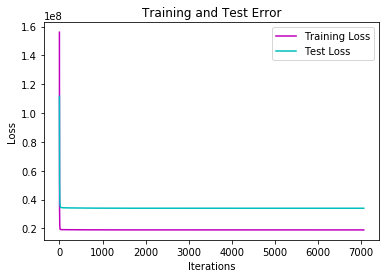


Calculated Parameter Values:

Intercept : -1952.161246354268
Coefficients : [[2322.76305327]
 [1191.41322917]
 [1200.5679722 ]
 [ 277.1817133 ]
 [ -84.11665863]
 [  -8.44094521]]

Predict using test data...
R2 Score : 0.7879649366892749
Model Accuracy: 78.7964936689275%
Cost : 16998342.21209275
MSE : 33996684.4241855




(array([[2322.76305327],
        [1191.41322917],
        [1200.5679722 ],
        [ 277.1817133 ],
        [ -84.11665863],
        [  -8.44094521]]), -1952.161246354268)

In [724]:
# Multiple variables - scaling is most helpful for multiple variables
df["yes_scaled"] = scale(df[["yes"]].values, 10)
df["age_scaled"] = scale(df[["age"]].values, 10)
df["bmi_scaled"] = scale(df[["bmi"]].values, 10)
df["region_scaled"] = scale(df[["region"]].values, 10)
df["children_scaled"] = scale(df[["children"]].values, 10)
df["male_scaled"] = scale(df[["male"]].values, 10)
x_scaled = df[["yes_scaled", "age_scaled", "bmi_scaled", "children_scaled", "region_scaled", "male_scaled"]].values 
#print(x_scaled[0:10])
y = df[["charges"]].values
#y_scaled = (y-min(y))/(max(y)-min(y)) # how to perform for each feature??
#print(y_scaled[0:10])
custom_linear_regr(x_scaled, y,  0.01, 0.0005, 0) #had to adjust learning rate to 0.1 and epsilon to 0.0005 to get back to 78% (but now only 4000 iterations)

Normal Equation
Intercept : [-1956.82617345]
Coefficients : [[232.28231694]
 [119.15901867]
 [120.10779045]
 [ 27.73064182]
 [ -8.39917262]
 [ -0.83650601]]

Training model...


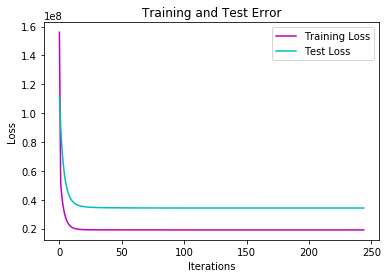


Calculated Parameter Values:

Intercept : -2.4103526489352776
Coefficients : [[229.74859013]
 [111.66094133]
 [ 99.08829921]
 [ 22.4976194 ]
 [-13.72232783]
 [ -4.05807672]]

Predict using test data...
R2 Score : 0.7861083579273467
Model Accuracy: 78.61083579273466%
Cost : 17147179.6762659
MSE : 34294359.3525318




(array([[229.74859013],
        [111.66094133],
        [ 99.08829921],
        [ 22.4976194 ],
        [-13.72232783],
        [ -4.05807672]]), -2.4103526489352776)

In [722]:
# Multiple variables - scaling is most helpful for multiple variables
df["yes_scaled"] = scale(df[["yes"]].values, 100)
df["age_scaled"] = scale(df[["age"]].values, 100)
df["bmi_scaled"] = scale(df[["bmi"]].values, 100)
df["region_scaled"] = scale(df[["region"]].values, 100)
df["children_scaled"] = scale(df[["children"]].values, 100)
df["male_scaled"] = scale(df[["male"]].values, 100)
x_scaled = df[["yes_scaled", "age_scaled", "bmi_scaled", "children_scaled", "region_scaled", "male_scaled"]].values 
#print(x_scaled[0:10])
y = df[["charges"]].values
#y_scaled = (y-min(y))/(max(y)-min(y)) # how to perform for each feature??
#print(y_scaled[0:10])
custom_linear_regr(x_scaled, y,  0.0001, 0.0005, 0) #had to adjust learning rate to 0.1 and epsilon to 0.0005 to get back to 78% (but now only 4000 iterations)

### Feature Standardisation

Feature standardisation rescales features to have zero mean and unit variance. This is achieved using the following equation:
$$
\begin{align}
x_j^{(i)} = \frac{x_j^{(i)} - \mu_{j}}{s_j}
\end{align}
$$

where $\mu_{j}$ is the mean of the feature $j$ and $s_j$ is the standard deviation of feature $j$.

It should be noted that standardisation must also be applied to the test data as well as the training data.
It should also be noted that standardization is not applied to the bias term $x_0$.

In [ ]:
#----FEATURE STANDARDISATION----#

def standardize(x_j): # takes in an array of input values for a single feature
    x_standard = (x_j-np.mean(x_j))/(np.std(x_j))
    return x_standard

#### Single Variable Linear Regression

In [ ]:
# Single variable
learning_rate = 0.01
epsilon = 0.0005
x = df[["bmi"]].values
print("Input Features x Before Standardization\n")
print(x[0:10])
x_standard = standardize(x)
print("Input Features x After Standardization\n")
print(x_standard[0:10])
y = df[["charges"]].values
#y_standard = standardize(y)
custom_linear_regr(x_standard, y,  learning_rate, epsilon) #had to adjust learning rate to 0.1 and epsilon to 0.0005 to get 4.9%, iterations 30

# seems worse for single variable??
# do we scale y as well??




In [ ]:
# Single variable

x = df[["bmi"]].values
print("Input Features x Before Standardization\n")
print(x[0:10])
x_standard = standardize(x)
print("Input Features x After Standardization\n")
print(x_standard[0:10])
y = df[["charges"]].values
y_standard = standardize(y)
custom_linear_regr(x_standard, y_standard,  0.1, 0.0005) #had to adjust learning rate to 0.1 and epsilon to 0.0005 to get 4.9%, iterations 30

# seems worse for single variable??
# do we scale y as well??


#### Multiple Variable Linear Regression

Normal Equation
Intercept : [13185.18614002]
Coefficients : [[9373.59383512]
 [3638.1603187 ]
 [1969.77669528]
 [ 668.33185738]
 [-309.22168657]
 [ -41.82301063]]

Training model...


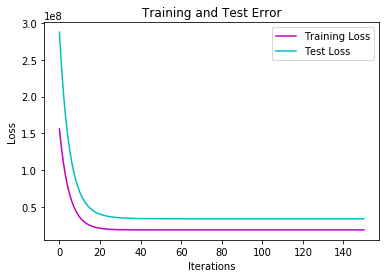


Calculated Parameter Values:

Intercept : 13185.18422419777
Coefficients : [[9373.59031508]
 [3638.16037762]
 [1969.77473789]
 [ 668.33238016]
 [-309.22023348]
 [ -41.82087244]]

Predict using test data...
R2 Score : 0.7879640600429741
Model Accuracy: 78.79640600429741%
Cost : 16998412.49072303
MSE : 33996824.98144606




(array([[9373.59031508],
        [3638.16037762],
        [1969.77473789],
        [ 668.33238016],
        [-309.22023348],
        [ -41.82087244]]), 13185.18422419777)

In [726]:
# Multiple variables - probably best to only transform input?
df["yes_standard"] = standardize(df[["yes"]].values)
df["age_standard"] = standardize(df[["age"]].values)
df["bmi_standard"] = standardize(df[["bmi"]].values)
df["region_standard"] = standardize(df[["region"]].values)
df["children_standard"] = standardize(df[["children"]].values)
df["male_standard"] = standardize(df[["male"]].values)
x_standard = df[["yes_standard", "age_standard", "bmi_standard", "children_standard", "region_standard", "male_standard"]].values 
#print(x_standard[0:10])
y = df[["charges"]].values
y_standard = standardize(y)
#y_scaled = (y-min(y))/(max(y)-min(y)) # how to perform for each feature??
#print(y_scaled[0:10])
#custom_linear_regr(x_standard, y_standard,  0.1, 0.0005, 0) # good results, 0.1, 0.0005, 50 iterations
custom_linear_regr(x_standard, y,  0.1, 0.0005, 0) # good results, 0.1, 0.0005, 50 iterations

In [ ]:
# Combine standardization and scaling?? (Understand their relationship)

### Regularization

Regularization reduces the complexity of the hypothesis function by minimizing the parameter values $\theta$. Regularization therefore aids in combatting overfitting. Ridge regression was implemented by adding a penalty term to the cost function as follows:

$$
\begin{align}
J(\theta) &= \frac{1}{2n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^d \theta_{j}^2 
\end{align}
$$

where $\lambda$ is a hyperparameter controlling the amount of regularization applied. It should be noted that regularization is not performed on the bias term.

In [727]:
#----REGULARISATION----# 
# try different ones

def regularized_cost(pred, true, lambda_1, theta):
    cost = (1/2)*np.mean((true - pred)**2) + lambda_1*(np.dot(np.transpose(theta), theta)) # does this dot product mean the same as sum of squares of component thetas
    #NB no regularization on the bias term therefore leave out
    cost = cost[0][0] # return in value form
    return cost

Accordingly, the gradient equation is updated to include the penalty term as follows:

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_{j}} &= \frac{\lambda}{n} \theta_j + \frac{1}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})(x_j^{(i)}) 
\end{align}
$$

The gradient for the bias term remains unchanged.

In [728]:
def regularized_gradient(pred, true, x, lambda_1, theta):
    grad =  ((lambda_1 * theta)/ pred.shape[0]) + (np.dot(np.transpose(x),(pred-true))/ pred.shape[0])# check order of operations
    return grad

Lastly, we can also modify the normal equation in order to directly compute the regularized weights.

$$
\begin{align}
\theta = (X^T X + \lambda I)^{-1} X^Ty
\end{align}
$$

where $I$ is the identity matrix.

In [729]:
def regularized_normal_eq(x_train, y_train, lambda_1):
    # add bias or not??
    #X0 = np.ones((x_train.shape[0],1)) # add x_0 = 1
    #Xnew = np.hstack((X0, x_train))
    #theta_all = np.dot(np.linalg.inv(np.dot(np.transpose(Xnew), Xnew) + (lambda_1*np.identity(Xnew.shape[1]))), np.dot(np.transpose(Xnew), y_train)) #when is it a dot product and when not
    theta_all = np.dot(np.linalg.inv(np.dot(np.transpose(x_train), x_train) + (lambda_1*np.identity(x_train.shape[1]))), np.dot(np.transpose(x_train), y_train)) 
    return theta_all

# see ridge regression trick?


In [733]:
def evaluate_regularized(x_test, y_test, theta, theta_0, lambda_1):
    y_pred = linear_pred(x_test, theta, theta_0)
    cost = regularized_cost(y_test, y_pred, lambda_1, theta)
    return cost

In [741]:

def regularized_batch_grad_desc(x, y, x_train, y_train, x_test, y_test, lr, epsilon, single, lambda_1): 
    
    # init all variables
    theta = np.zeros((len(x_train[0]), 1)) # initialise weight matrix with shape (d x 1)
    theta_0 = 0 # initialise bias term
    MAX_LOOPS = 100 # for use if maximum iterations is used as stopping condition
    loops = 0 # loop counter
    theta_prev = np.ones((len(x_train[0]), 1))  # ensures while loop runs at least once
    
    losses = [] # track training losses
    test_losses = [] # track test losses
    thetas = [] # track parameter values
    theta_0s = [] # track bias values

    while(euclid(theta, theta_prev) > epsilon): #seems to work > 0.1 #can get closer to 78% by making this stricter 0.05-> but 120000 iterations (comment on this)
        #print(euclid(theta, theta_prev))
        pred = linear_pred(x_train, theta, theta_0)
        loss = regularized_cost(pred, y_train, lambda_1, theta)
        #loss = mean_squared_error(pred, y_train) # this works therefore cost must be wrong
        losses.append(loss)
        #grad = gradient(pred, y_train, x_train) #is there a different one for bias
        grad = regularized_gradient(pred, y_train, x_train, lambda_1, theta) 
        grad_theta_0 = theta_0_gradient(pred, y_train, x_train)
        theta_prev = theta
        theta_0 = theta_0 - (lr*grad_theta_0) #update bias - no regularization applied here
        #print(lr*(lambda_1/pred.shape[0]))
        #print(pred.shape[0])
        #theta = theta*(1-(lr*(lambda_1/pred.shape[0]))) - (lr*grad) # does this include theta_0? - do we update the bias separately?
        theta = theta - (lr*grad)
        test_loss = evaluate_regularized(x_test, y_test, theta, theta_0, lambda_1)
        test_losses.append(test_loss)
        loops += 1 
    
    # Visualise train and test error and gradient descent process
    plot_test_train_loss(losses, test_losses)
    if(single==1):
        visualisation(x, y, losses, test_losses, thetas, theta_0s)
    return [theta, theta_0]

In [742]:
def regularized_linear_regr(x, y, lr, epsilon, single, lambda_1):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0) 

    print("Normal Equation: {}".format(regularized_normal_eq(x_train, y_train, lambda_1)))

    theta, theta_0 = regularized_batch_grad_desc(x, y, x_train, y_train, x_test, y_test, lr, epsilon, single, lambda_1) #what is the correct way to do this?
    print("Intercept : {}".format(theta_0))
    print("Coefficients : {}".format(theta))


    y_pred = linear_pred(x_test, theta, theta_0) #predict

    score = r2_score(y_test , y_pred)
    print("R2 Score : {}".format(score))
    print("Model Accuracy: {}%".format(score * 100))


    print("Cost : {}".format(regularized_cost(y_pred, y_test, lambda_1, theta)))
    print("MSE : {}".format(mean_squared_error(y_test, y_pred)))
    print("\n")

In [ ]:
x = df[["yes", "age", "bmi", "children", "region", "male"]].values #all features included for now, region makes a difference even though correlation is low??
y = df[["charges"]].values
regularized_linear_regr(x, y,  0.00001, 0.005, 100) #11.7%, 200 iterations, (74%, 120000 iterations - same as if no regularization)



Normal Equation: [[9247.92735427]
 [3966.87634429]
 [1873.02021688]
 [ 591.98026275]
 [ 161.50513174]
 [-301.32003914]]


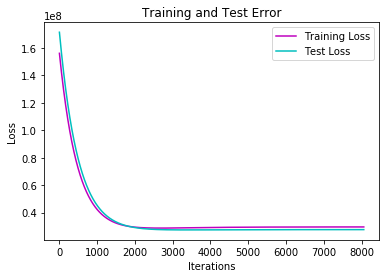

Intercept : 13180.83333318194
Coefficients : [[9367.64658638]
 [3636.67291974]
 [1968.43425385]
 [ 668.88213073]
 [-308.2734147 ]
 [ -40.21458637]]
R2 Score : 0.7878917108654011
Model Accuracy: 78.78917108654011%
Cost : 27543910.442686565
MSE : 34008425.10135027




In [745]:
# Moderate regularization (+ standardization)

df["yes_standard"] = standardize(df[["yes"]].values)
df["age_standard"] = standardize(df[["age"]].values)
df["bmi_standard"] = standardize(df[["bmi"]].values)
df["region_standard"] = standardize(df[["region"]].values)
df["children_standard"] = standardize(df[["children"]].values)
df["male_standard"] = standardize(df[["male"]].values)
x_standard = df[["yes_standard", "age_standard", "bmi_standard", "children_standard", "region_standard", "male_standard"]].values
y = df[["charges"]].values
regularized_linear_regr(x_standard, y,  0.001, 0.005, 0, 0.1)

Train and test error now closer together indicating less overfitting?? Why does error increase again?? (if regularization is too strong?) Compare if coefficients have been decreased in magnitude from previous version. Find out if standardization is necessary. Try do plots next to each other showing differences.

Normal Equation: [[9249.02224117]
 [3967.35312173]
 [1873.19911948]
 [ 591.99820565]
 [ 161.54310357]
 [-301.42804717]]


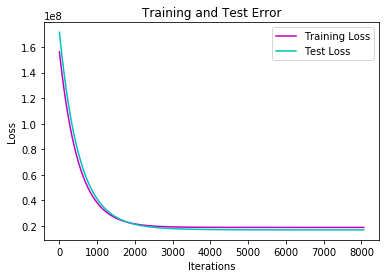

Intercept : 13180.840623651842
Coefficients : [[9368.7499928 ]
 [3637.10753399]
 [1968.63696047]
 [ 668.91280566]
 [-308.29323955]
 [ -40.29584384]]
R2 Score : 0.787901449129699
Model Accuracy: 78.7901449129699%
Cost : 17003537.2790669
MSE : 34006863.71478992




In [749]:
# Weak regularization

df["yes_standard"] = standardize(df[["yes"]].values)
df["age_standard"] = standardize(df[["age"]].values)
df["bmi_standard"] = standardize(df[["bmi"]].values)
df["region_standard"] = standardize(df[["region"]].values)
df["children_standard"] = standardize(df[["children"]].values)
df["male_standard"] = standardize(df[["male"]].values)
x_standard = df[["yes_standard", "age_standard", "bmi_standard", "children_standard", "region_standard", "male_standard"]].values
y = df[["charges"]].values
regularized_linear_regr(x_standard, y,  0.001, 0.005, 0, 0.000001)

Normal Equation: [[9238.08498859]
 [3962.59053639]
 [1871.41153022]
 [ 591.81843225]
 [ 161.16405671]
 [-300.34981695]]


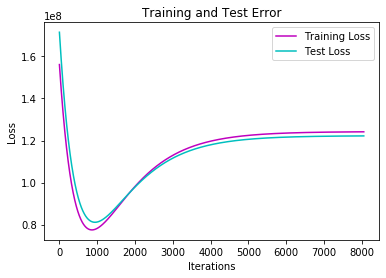

Intercept : 13180.767531031515
Coefficients : [[9357.72752436]
 [3632.7660822 ]
 [1966.61170101]
 [ 668.60588785]
 [-308.09494957]
 [ -39.48487791]]
R2 Score : 0.7878033007284303
Model Accuracy: 78.78033007284303%
Cost : 122186430.97665155
MSE : 34022600.3584024




In [746]:
# Strong regularization

df["yes_standard"] = standardize(df[["yes"]].values)
df["age_standard"] = standardize(df[["age"]].values)
df["bmi_standard"] = standardize(df[["bmi"]].values)
df["region_standard"] = standardize(df[["region"]].values)
df["children_standard"] = standardize(df[["children"]].values)
df["male_standard"] = standardize(df[["male"]].values)
x_standard = df[["yes_standard", "age_standard", "bmi_standard", "children_standard", "region_standard", "male_standard"]].values
y = df[["charges"]].values
regularized_linear_regr(x_standard, y,  0.001, 0.005, 0, 1)

Normal Equation: [[9140.80740904]
 [3920.24408739]
 [1855.46734848]
 [ 590.16719134]
 [ 157.81893919]
 [-290.82881515]]


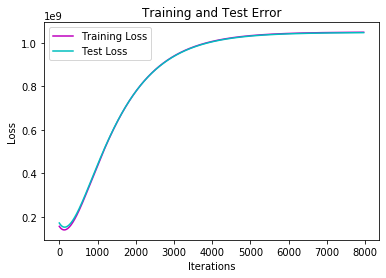

Intercept : 13180.109335109386
Coefficients : [[9259.69919092]
 [3594.16444616]
 [1948.56900867]
 [ 665.82593864]
 [-306.31006273]
 [ -32.34999282]]
R2 Score : 0.7868456106117805
Model Accuracy: 78.68456106117804%
Cost : 1047039725.0088259
MSE : 34176151.79543144




In [750]:
# Strong regularization

df["yes_standard"] = standardize(df[["yes"]].values)
df["age_standard"] = standardize(df[["age"]].values)
df["bmi_standard"] = standardize(df[["bmi"]].values)
df["region_standard"] = standardize(df[["region"]].values)
df["children_standard"] = standardize(df[["children"]].values)
df["male_standard"] = standardize(df[["male"]].values)
x_standard = df[["yes_standard", "age_standard", "bmi_standard", "children_standard", "region_standard", "male_standard"]].values
y = df[["charges"]].values
regularized_linear_regr(x_standard, y,  0.001, 0.005, 0, 10)

What is happening here???

In [ ]:
# NB to try combo of all three of these methods

## 4. Additional Experimentation

In [767]:
#---STOCHASTIC GRADIENT DESCENT---#
from sklearn.utils import shuffle

def stochastic_grad_desc(x, y, x_train, y_train, x_test, y_test, lr, epsilon, single):
    
    # init all variables
    theta = np.zeros((len(x_train[0]), 1)) # initialise weight matrix with shape (d x 1)
    theta_0 = 0 # initialise bias term
    MAX_LOOPS = 40 # for use if maximum iterations is used as stopping condition
    loops = 0 # loop counter
    theta_prev = np.ones((len(x_train[0]), 1))  # ensures while loop runs at least once
    
    losses = [] # track training losses
    test_losses = [] # track test losses
    thetas = [] # track parameter values
    theta_0s = [] # track bias values
    
    # perform gradient descent until convergence
    while(loops < MAX_LOOPS): # alternative stopping condition
    #while(euclid(theta, theta_prev) > epsilon): # stop when change in theta values is no longer signficant
        
        # randomly shuffle data but keep (x, y) pairs!
        #x_train = shuffle(x_train) # what about y matching this?
        n = x_train.shape[0] 
        for i in range(n):
            pred = linear_pred(x_train[i], theta, theta_0) # predict for all training samples
            loss = cost(pred, y_train[i]) # calculate cost based on current theta values
            losses.append(loss)
            theta_prev = theta # store previous theta for use in stopping condition
            thetas.append(theta) # store theta values for visualisation
            theta_0s.append(theta_0) # store bias values for visualisation
            grad = gradient(pred, y_train[i], x_train[i]) # calculate gradient wrt theta
            #print(grad)
            grad_theta_0 = theta_0_gradient(pred, y_train[i], x_train[i]) # calculate gradient wrt theta_0
            theta = theta - (lr*grad) # update parameters
            theta_0 = theta_0 - (lr*grad_theta_0) # update bias
            test_loss = evaluate(x_test, y_test, theta, theta_0) # must we still calculate test loss over all samples?
            test_losses.append(test_loss)
        loops += 1
        
    # Visualise train and test error and gradient descent process
    #visualisation(losses, test_losses, thetas)
    plt.plot(losses, label = "Training Loss", color = 'm')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    if(single==1):
        visualisation(x, y, losses, test_losses, thetas, theta_0s)
    return [theta, theta_0] # return fitted parameter values
    

In [768]:
def stochastic_linear_regr(x, y, lr, epsilon, single):

    # split data into train and test sets 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

    print("Normal Equation")
    print("Intercept : {}".format(normal_eq(x_train, y_train)[0]))
    print("Coefficients : {}".format(normal_eq(x_train, y_train)[1:]))
    
    
    # perform batch gradient descent
    print("\nTraining model...")
    theta, theta_0 = stochastic_grad_desc(x, y, x_train, y_train, x_test, y_test, lr, epsilon, single) # fit model using training data
    
    print("\nCalculated Parameter Values:\n")
    print("Intercept : {}".format(theta_0))
    print("Coefficients : {}".format(theta))

    print("\nPredict using test data...")
    y_pred = linear_pred(x_test, theta, theta_0) # predict on test data

    score = r2_score(y_test , y_pred)
    print("R2 Score : {}".format(score))
    print("Model Accuracy: {}%".format(score * 100))


    print("Cost : {}".format(cost(y_pred, y_test)))
    print("MSE : {}".format(mean_squared_error(y_test, y_pred)))
    print("\n")
    
    return theta, theta_0


Normal Equation
Intercept : [13136.72676751]
Coefficients : [[2069.73310798]]

Training model...


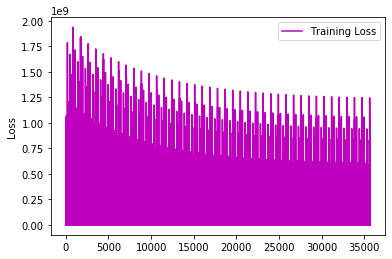

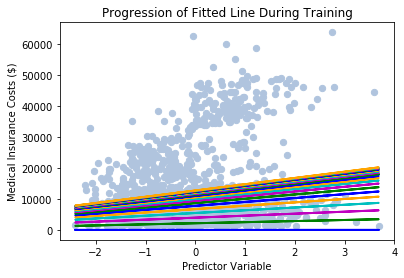

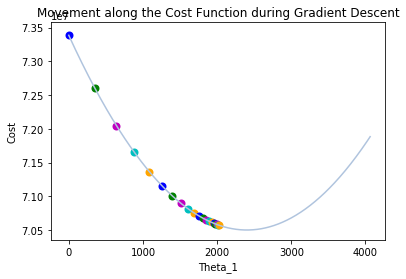


Calculated Parameter Values:

Intercept : 12793.575779406514
Coefficients : [[2032.44981409]]

Predict using test data...
R2 Score : 0.04700923060002604
Model Accuracy: 4.700923060002604%
Cost : 76398983.12236807
MSE : 152797966.24473614




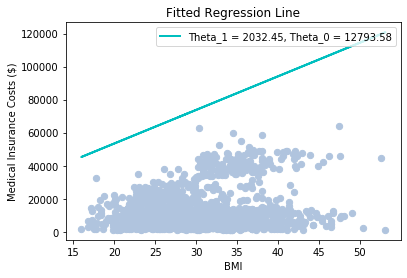

In [770]:
# much slower since no vectorised computation
# only produces good results when also standardised
# is this line that it plots even correct - why is it so high up - outliers and standardization???
learning_rate = 0.0001
epsilon = 0.05
x = df[["bmi"]].values
x_standard = standardize(x)
y = df[["charges"]].values
#y_standard = standardize(y)
theta, theta_0 = stochastic_linear_regr(x_standard, y,  learning_rate, epsilon, 1)
#theta, theta_0 = stochastic_linear_regr(x, y,  learning_rate, epsilon)
variable_name = "BMI"
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

It should be noted that the calculated parameter values are close to those computed by the normal equation.

In [ ]:
# Equivalent using batch gradient descent
learning_rate = 0.001
epsilon = 0.0005
num_loops = 10000
x = df[["bmi"]].values
x_standard = standardize(x)
y = df[["charges"]].values
#theta, theta_0 = custom_linear_regr(x_standard, y,  learning_rate, epsilon, num_loops, 1)
theta, theta_0 = custom_linear_regr(x_standard, y,  learning_rate, epsilon, 1)
plot_hypothesis(x, y, theta, theta_0)

In [771]:
# Multiple variables - probably best to only transform input?
df["yes_standard"] = standardize(df[["yes"]].values)
df["age_standard"] = standardize(df[["age"]].values)
df["bmi_standard"] = standardize(df[["bmi"]].values)
df["region_standard"] = standardize(df[["region"]].values)
df["children_standard"] = standardize(df[["children"]].values)
df["male_standard"] = standardize(df[["male"]].values)
x_standard = df[["yes_standard", "age_standard", "bmi_standard", "children_standard", "region_standard", "male_standard"]].values 
#print(x_standard[0:10])
y = df[["charges"]].values
y_standard = standardize(y)
#y_scaled = (y-min(y))/(max(y)-min(y)) # how to perform for each feature??
#print(y_scaled[0:10])
#custom_linear_regr(x_standard, y_standard,  0.1, 0.0005, 0) # good results, 0.1, 0.0005, 50 iterations
stochastic_linear_regr(x_standard, y,  0.01, 0.0005, 0) # good results, 0.1, 0.0005, 50 iterations


Normal Equation
Intercept : [13185.18614002]
Coefficients : [[9373.59383512]
 [3638.1603187 ]
 [1969.77669528]
 [ 668.33185738]
 [-309.22168657]
 [ -41.82301063]]

Training model...


ValueError: shapes (6,) and (1,) not aligned: 6 (dim 0) != 1 (dim 0)

In [ ]:
# Take linear regr to the max! Inspo from websites + UCT assignment
# Make sure you have fulfilled requirements properly first

# Outlier detection/removal

In [ ]:
#---MINI-BATCH GRADIENT DESCENT---#
from sklearn.utils import shuffle

def mini_batch_grad_desc(x_train, y_train, x_test, y_test, lr, epsilon):
    
    # init all variables
    batch_size = 10
    theta = np.zeros((len(x_train[0]), 1)) # initialise weight matrix with shape (d x 1)
    theta_0 = 0 # initialise bias term
    no_batches = np.floor(x_train.shape[0]/batch_size)
    MAX_LOOPS = 2*(no_batches) # for use if maximum iterations is used as stopping condition
    loops = 0 # loop counter
    theta_prev = np.ones((len(x_train[0]), 1))  # ensures while loop runs at least once
    
    losses = [] # track training losses
    test_losses = [] # track test losses
    thetas = [] # track parameter values
    
    # perform gradient descent until convergence
    start = 0
    while(loops < MAX_LOOPS): # alternative stopping condition
    #while(euclid(theta, theta_prev) > epsilon): # stop when change in theta values is no longer signficant
        
        # randomly shuffle data
        #x_train = shuffle(x_train)
        x_batch = x_train[start: start+batch_size]
        y_batch = y_train[start: start+batch_size]
        pred = linear_pred(x_batch, theta, theta_0) # predict for all training samples
        #print(pred)
        loss = cost(pred, y_batch) # calculate cost based on current theta values
        losses.append(loss)
        theta_prev = theta # store previous theta for use in stopping condition
        thetas.append(theta) # store theta values for visualisation
        grad = gradient(pred, y_batch, x_batch) # calculate gradient wrt theta
        grad_theta_0 = theta_0_gradient(pred, y_batch, x_batch) # calculate gradient wrt theta_0
        theta = theta - (lr*grad) # update parameters
        theta_0 = theta_0 - (lr*grad_theta_0) # update bias
        #test_loss = evaluate(x_test, y_test, theta, theta_0) # must we still calculate test loss over all samples?
        #test_losses.append(test_loss)
        loops += 1
        if(loops == no_batches):
            start = 0
        start += batch_size
        
    # Visualise train and test error and gradient descent process
    #visualisation(losses, test_losses, thetas)
    plt.plot(losses, label = "Training Loss", color = 'm')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return [theta, theta_0] # return fitted parameter values

In [ ]:
def mini_batch_linear_regr(x, y, lr, epsilon):

    # split data into train and test sets 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

    print("Normal Equation")
    print("Intercept : {}".format(normal_eq(x_train, y_train)[0]))
    print("Coefficients : {}".format(normal_eq(x_train, y_train)[1:]))
    
    
    # perform batch gradient descent
    print("\nTraining model...")
    theta, theta_0 = mini_batch_grad_desc(x_train, y_train, x_test, y_test, lr, epsilon) # fit model using training data
    
    print("\nCalculated Parameter Values:\n")
    print("Intercept : {}".format(theta_0))
    print("Coefficients : {}".format(theta))

    print("\nPredict using test data...")
    y_pred = linear_pred(x_test, theta, theta_0) # predict on test data

    score = r2_score(y_test , y_pred)
    print("R2 Score : {}".format(score))
    print("Model Accuracy: {}%".format(score * 100))


    print("Cost : {}".format(cost(y_pred, y_test)))
    print("MSE : {}".format(mean_squared_error(y_test, y_pred)))
    print("\n")
    
    return theta, theta_0

In [ ]:
# why is loss not increasing or decreasing?
learning_rate = 0.0001
epsilon = 0.0005
x = df[["bmi"]].values
x_standard = standardize(x)
y = df[["charges"]].values
#y_standard = standardize(y)
theta, theta_0 = mini_batch_linear_regr(x, y,  learning_rate, epsilon)
#theta, theta_0 = mini_batch_linear_regr(x_standard, y,  learning_rate, epsilon)
plot_hypothesis(x, y, theta, theta_0)

In [ ]:
#----BASIC LINEAR REGRESSION----#

# NB we need to manually do gradient descent!!
# Splitting into train and test sets is NB

#Explore linear relationship between age and charges (single variable linear regression)
#Use this to check our results
#Check result using scikit-learn
#x = df[["yes", "age", "bmi", "male", "children", "region"]] #all features included for now
x = df[["yes", "age", "bmi", "children", "region", "male"]] #all features included for now
#region makes a difference even though correlation is low??
y = df[["charges"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0) 

model = LinearRegression() #create linear model
model.fit(x_train, y_train) #fit model to data
y_pred = model.predict(x_test)
print(model.intercept_)
print(model.coef_)


from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(y_test , y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%".format(score * 100))
mse =  mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {}".format(mse))

In [ ]:
#Explore linear relationship between smoking and charges (single variable linear regression)
#Rather implement yourself? - given it is so many marks
#Check result using scikit-learn
x = df[["bmi"]]
y = df[["charges"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0) 

model = LinearRegression() #create linear model
model.fit(x_train, y_train) #fit model to data
y_pred = model.predict(x_test)
print(model.intercept_)
print(model.coef_)


from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(y_test , y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%".format(score * 100))
mse =  mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {}".format(mse))
# We observe that approx. 62% of predictive power comes from smoking status

In [ ]:
plt.plot(x_test, y_test, 'o')
f = lambda x_test: 247.90264149*x_test + 3337.27583294
# x values of line to plot
# plot fit
plt.plot(x_test,f(x_test),lw=2.5, c="k")